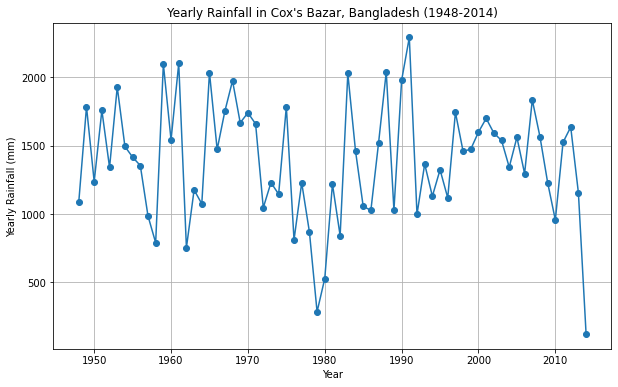

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

rainfall_data = 'data/rainfall_modified_data_bangladesh_1948_to_2014.csv'

# Read the CSV file
df = pd.read_csv(rainfall_data)

# Get unique values from a specific column
cox_rainfall = df[df['Station'] == "Cox's Bazar"].copy()

# Calculate the annual rainfall by summing up monthly totals
cox_rainfall['Yearly Rainfall'] = cox_rainfall[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']].sum(axis=1)

# Group by year and sum the rainfall
yearly_rainfall = cox_rainfall.groupby('Year')['Yearly Rainfall'].sum()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title("Yearly Rainfall in Cox's Bazar, Bangladesh (1948-2014)")
plt.grid(True)
plt.show()

In [6]:
# Trend Analysis
slope, intercept, r_value, p_value, std_err = linregress(yearly_rainfall.index, yearly_rainfall.values)
plt.figure(figsize=(10, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall.values, marker='o', label='Yearly Rainfall')
plt.plot(yearly_rainfall.index, intercept + slope * yearly_rainfall.index, 'r', label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Yearly Rainfall (mm)')
plt.title('Yearly Rainfall Trend')
plt.legend()
plt.show()
print(f"Trend Slope: {slope:.2f} mm/year, p-value: {p_value:.2f}")

NameError: name 'linregress' is not defined

In [7]:
import pandas as pd

# Load the customized daily rainfall data
df = pd.read_csv('data/customized_daily_rainfall_data.csv')

# Filter data for Cox's Bazar from the year 2000 onwards
df = df[(df['Year'] >= 2000) & (df['Station'] == 'CoxsBazar')]

# Pivot the data to have columns for each day of the month
daily_rainfall_from2000 = df.pivot_table(index=['Year', 'Month'], columns='Day', values='Rainfall', fill_value=0)

# Calculate the total monthly rainfall
daily_rainfall_from2000['MonthlyRainfall'] = daily_rainfall_from2000.sum(axis=1)

# Reset the index to turn 'Year' and 'Month' into columns
daily_rainfall_from2000.reset_index(inplace=True)

# Ensure all days from 1 to 31 are present as columns
for day in range(1, 32):
    if day not in daily_rainfall_from2000.columns:
        daily_rainfall_from2000[day] = 0

# Reorder columns to match the desired format
columns = ['Year', 'Month'] + list(range(1, 32)) + ['MonthlyRainfall']
daily_rainfall_from2000 = daily_rainfall_from2000[columns]

# Save the new DataFrame to a CSV file
daily_rainfall_from2000.to_csv('data/daily_rainfall_from2000.csv', index=False)

# Display the new DataFrame
print(daily_rainfall_from2000)
daily_rainfall_from2000.head()

Day  Year  Month     1     2     3     4     5     6     7    8  ...   23  \
0    2000      1   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  1.0   
1    2000      2   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
2    2000      3   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
3    2000      4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   
4    2000      5  16.0   2.0  56.0   0.0  19.0   7.0  10.0  1.0  ...  8.0   
..    ...    ...   ...   ...   ...   ...   ...   ...   ...  ...  ...  ...   
199  2016      8  26.0   0.0   0.0   5.0  15.0  12.0  61.0  5.0  ...  0.0   
200  2016      9  26.0  56.0  30.0  12.0  17.0  38.0   3.0  7.0  ...  6.0   
201  2016     10   0.0   0.0   5.0  49.0   8.0   0.0   0.0  2.0  ...  0.0   
202  2016     11   0.0   0.0   0.0   0.0   9.0  15.0  17.0  0.0  ...  0.0   
203  2016     12   0.0   0.0   0.0   0.0   0.0   0.0   0.0  0.0  ...  0.0   

Day     24    25    26    27    28    29    30   31  MonthlyRainfall  
0   

Day,Year,Month,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,MonthlyRainfall
0,2000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2000,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2000,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0
3,2000,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,15.0,16.0,6.0,4.0,0.0,3.0,0.0,65.0
4,2000,5,16.0,2.0,56.0,0.0,19.0,7.0,10.0,1.0,...,8.0,101.0,76.0,10.0,70.0,18.0,10.0,18.0,0.0,589.0


In [8]:
import pandas as pd

# Load the formatted daily rainfall data
df = pd.read_csv('data/daily_rainfall_from2000.csv')

# Group by Year and sum the MonthlyRainfall to get the annual rainfall
annual_rainfall_df = df.groupby('Year')['MonthlyRainfall'].sum().reset_index()

# Rename the column to 'AnnualRainfall'
annual_rainfall_df.rename(columns={'MonthlyRainfall': 'AnnualRainfall'}, inplace=True)

# Save the new DataFrame to a CSV file
annual_rainfall_df.to_csv('data/annual_rainfall_from2000.csv', index=False)

# Display the new DataFrame
print(annual_rainfall_df)

    Year  AnnualRainfall
0   2000          4707.0
1   2001          4014.0
2   2002          3918.0
3   2003          4113.0
4   2004          3282.0
5   2005          3384.0
6   2006          3529.0
7   2007          4006.0
8   2008          4144.0
9   2009          3283.0
10  2010          3438.0
11  2011          4440.0
12  2012          4123.0
13  2013          4059.0
14  2014          2483.0
15  2015          4716.0
16  2016          3297.0


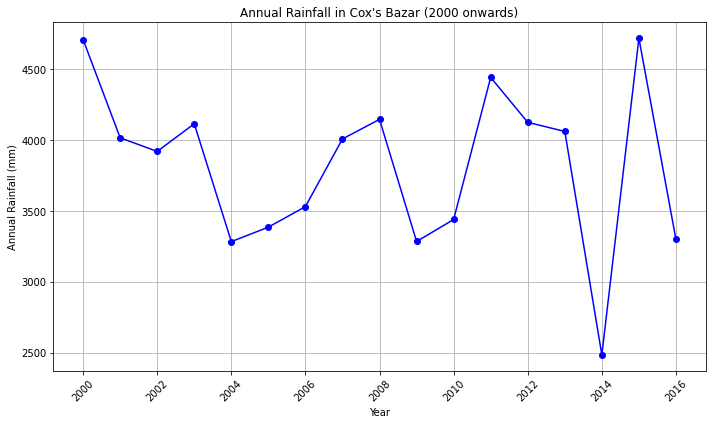

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the annual rainfall data
annual_rainfall_df = pd.read_csv('data/annual_rainfall_from2000.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(annual_rainfall_df['Year'], annual_rainfall_df['AnnualRainfall'], marker='o', linestyle='-', color='b')
plt.title('Annual Rainfall in Cox\'s Bazar (2000 onwards)')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [10]:
import pandas as pd
# Load the daily rainfall data
df = pd.read_csv('data/daily_rainfall_from2000.csv')

# Group by year and find the maximum rainfall for each year
annual_maxima = df.groupby('Year')['MonthlyRainfall'].max().reset_index()

# Display the annual maxima
print(annual_maxima)

    Year  MonthlyRainfall
0   2000           1300.0
1   2001           1373.0
2   2002           1236.0
3   2003           1349.0
4   2004            751.0
5   2005            957.0
6   2006            802.0
7   2007           1274.0
8   2008           1318.0
9   2009            971.0
10  2010            982.0
11  2011           1226.0
12  2012           1130.0
13  2013           1000.0
14  2014            717.0
15  2015           1573.0
16  2016           1113.0


In [11]:
import numpy as np

# Apply logarithmic transformation to the annual maximum rainfall values
annual_maxima['LogRainfall'] = np.log(annual_maxima['MonthlyRainfall'])

# Display the log-transformed values
print(annual_maxima)

    Year  MonthlyRainfall  LogRainfall
0   2000           1300.0     7.170120
1   2001           1373.0     7.224753
2   2002           1236.0     7.119636
3   2003           1349.0     7.207119
4   2004            751.0     6.621406
5   2005            957.0     6.863803
6   2006            802.0     6.687109
7   2007           1274.0     7.149917
8   2008           1318.0     7.183871
9   2009            971.0     6.878326
10  2010            982.0     6.889591
11  2011           1226.0     7.111512
12  2012           1130.0     7.029973
13  2013           1000.0     6.907755
14  2014            717.0     6.575076
15  2015           1573.0     7.360740
16  2016           1113.0     7.014814


Location: 6.885975117973894, Scale: 0.22300140152683373


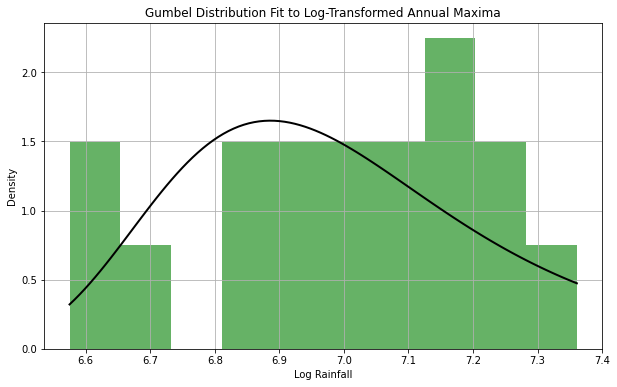

In [12]:
from scipy.stats import gumbel_r
import matplotlib.pyplot as plt

# Fit a Gumbel distribution to the log-transformed annual maximum rainfall values
params = gumbel_r.fit(annual_maxima['LogRainfall'])

# Extract the location and scale parameters
loc, scale = params

# Display the parameters
print(f"Location: {loc}, Scale: {scale}")

# Plot the fitted Gumbel distribution
x = np.linspace(annual_maxima['LogRainfall'].min(), annual_maxima['LogRainfall'].max(), 100)
pdf = gumbel_r.pdf(x, loc, scale)

plt.figure(figsize=(10, 6))
plt.hist(annual_maxima['LogRainfall'], bins=10, density=True, alpha=0.6, color='g')
plt.plot(x, pdf, 'k', linewidth=2)
plt.title('Gumbel Distribution Fit to Log-Transformed Annual Maxima')
plt.xlabel('Log Rainfall')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Location: 6.885975117973894, Scale: 0.22300140152683373


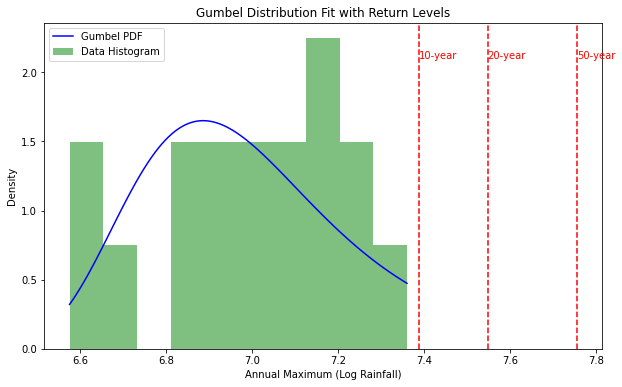

Return Levels for different return periods:
10-year return period: 7.39 (Log Rainfall)
20-year return period: 7.55 (Log Rainfall)
50-year return period: 7.76 (Log Rainfall)

Interpretation:
The 10-year return level indicates that there is a 10.00% chance each year that the log-transformed rainfall will exceed 7.39.
The 20-year return level indicates that there is a 5.00% chance each year that the log-transformed rainfall will exceed 7.55.
The 50-year return level indicates that there is a 2.00% chance each year that the log-transformed rainfall will exceed 7.76.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming annual_maxima['LogRainfall'] is already defined and contains the log-transformed data

# Fit a Gumbel distribution to the log-transformed annual maximum rainfall values
params = stats.gumbel_r.fit(annual_maxima['LogRainfall'])

# Extract the location and scale parameters
loc, scale = params

# Display the parameters
print(f"Location: {loc}, Scale: {scale}")

# Calculate return levels
return_periods = [10, 20, 50]
return_levels = stats.gumbel_r.ppf(1 - 1/np.array(return_periods), loc, scale)

# Plot the fitted Gumbel distribution
plt.figure(figsize=(10, 6))
x = np.linspace(min(annual_maxima['LogRainfall']), max(annual_maxima['LogRainfall']), 100)
pdf = stats.gumbel_r.pdf(x, loc, scale)
plt.plot(x, pdf, label='Gumbel PDF', color='blue')

# Adjust the histogram
plt.hist(annual_maxima['LogRainfall'], bins=10, density=True, alpha=0.5, label='Data Histogram', color='g')

# Add vertical lines for return levels
for rp, rl in zip(return_periods, return_levels):
    plt.axvline(rl, color='red', linestyle='--')
    plt.text(rl, plt.ylim()[1]*0.9, f'{rp}-year', color='red', verticalalignment='center')
    

plt.xlabel('Annual Maximum (Log Rainfall)')
plt.ylabel('Density')
plt.title('Gumbel Distribution Fit with Return Levels')
plt.legend()
plt.show()

print("Return Levels for different return periods:")
for rp, rl in zip(return_periods, return_levels):
    print(f"{rp}-year return period: {rl:.2f} (Log Rainfall)")

# Interpretation
print("\nInterpretation:")
for rp, rl in zip(return_periods, return_levels):
    print(f"The {rp}-year return level indicates that there is a {100/rp:.2f}% chance each year that the log-transformed rainfall will exceed {rl:.2f}.")

1. Obtain and Preprocess your DEM

Acquire High-Resolution DEM: As mentioned before, aim for a DEM with high spatial resolution (e.g., ALOS DEM, TanDEM-X) to capture the terrain details accurately.
Process in GIS Software: Import your DEM into a GIS software package (QGIS, ArcGIS).
Project to the Correct Coordinate System: Ensure your DEM is in the same coordinate system as your other spatial data (e.g., camp locations, rainfall data).

2. Derive Terrain Derivatives

Slope: Calculate the slope angle (in degrees or percent) for each cell in your DEM. Steeper slopes generally have lower flood potential due to faster runoff.
Aspect: Determine the direction that each slope faces (e.g., north, south, east, west). This can influence sun exposure and, potentially, snowmelt patterns (if relevant in your area).
Curvature: Calculate the curvature of the terrain, which indicates whether a slope is concave (inward-curving) or convex (outward-curving). Concave areas tend to accumulate water, increasing flood potential.

3. Identify Areas with Higher Flood Potential

Low Elevation: Identify areas with low elevation relative to the surrounding terrain. These are natural depressions where water is likely to accumulate.
Valleys and Depressions: Use topographic maps or create visualizations (e.g., hillshade) to identify valleys, depressions, and other low-lying areas.
Flow Accumulation: Calculate flow accumulation, which represents the amount of water flowing into each cell based on the terrain. Higher flow accumulation indicates areas where water converges, increasing flood risk.
Topographic Wetness Index (TWI): Consider calculating TWI, which combines slope and flow accumulation to estimate soil moisture. Higher TWI values suggest areas that are likely to be wetter and more susceptible to flooding.

4. Identify Areas with Lower Flood Potential

Higher Elevation: Areas at higher elevations are less likely to flood, as water flows downhill.
Ridges and Hills: Identify ridges and hills, which act as natural drainage divides.
Steep Slopes: Steeper slopes generally have lower flood potential due to faster runoff.

5.  Combine Terrain Analysis with Other Factors

Soil Type: Incorporate soil type data. Soils with low permeability (e.g., clay) are more prone to flooding than those with high permeability (e.g., sand).
Land Cover: Consider land cover. Dense vegetation can intercept rainfall and reduce runoff, while impervious surfaces (roads, buildings) increase runoff and flood risk.
Historical Flood Data: If you have records of past floods, use them to identify areas that have historically been inundated.

6. Visualize and Interpret

Create Maps: Create maps that show the spatial variation in flood potential based on your analysis. Use color gradients or symbols to represent different levels of risk.
Overlay with Camp Locations: Overlay your flood potential map with the locations of the Rohingya refugee camps to identify camps or specific areas within camps that are most at risk.